In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load datasets

In [17]:
data_demo = pd.read_csv('EValuateNY-ZIP-File/census_bureau_demographics.csv')

In [20]:
data_charging = pd.read_csv('EValuateNY-ZIP-File/resources_charginguse.csv')

In [149]:
data_rebate = pd.read_csv('EValuateNY-ZIP-File/resources_driveclean.csv')

In [129]:
data_demo.head()

,Household Income in Past 12 Months,Households,Households (1 Vehicle Available),Households (2 Vehicles Available),Households (3 Vehicles Available),Households (4 or More Vehicles Available),Households (No Vehicle Available),Housing Units,"Housing Units (1, Attached)","Housing Units (1, Detached)",...,"Educational Attainment (12th grade, no diploma)",Educational Attainment (Regular high school diploma),Educational Attainment (GED or alternative credential),"Educational Attainment (Some college, less than 1 year)","Educational Attainment (Some college, 1 or more years, no degree)",Educational Attainment (Associate's degree),Educational Attainment (Bachelor's degree),Educational Attainment (Master's degree),Educational Attainment (Professional school degree),Educational Attainment (Doctorate degree)
2,17256,17256,5670,792,126,34,10634,18656,604,373,...,438.0,3966.0,642.0,1128.0,2744.0,1282.0,11797.0,4846.0,814.0,271.0
3,29345,29345,7844,1954,356,155,19036,32088,1755,578,...,990.0,13737.0,2235.0,1374.0,5981.0,3803.0,8449.0,3310.0,430.0,321.0
4,32269,32269,13713,3200,381,68,14907,35319,2212,2491,...,1269.0,11484.0,1656.0,1411.0,4407.0,4521.0,16573.0,8694.0,2083.0,1053.0
5,6356,6356,2455,2382,773,274,472,6584,558,3785,...,537.0,3732.0,659.0,523.0,1547.0,1019.0,3192.0,1711.0,455.0,143.0
6,7500,7500,3038,2302,497,188,1475,7983,998,3316,...,519.0,4005.0,646.0,596.0,2449.0,1407.0,3395.0,1651.0,372.0,153.0


In [130]:
data_charging.head()

,Start Date,ZIP Code,Network,Charging Time (hours),Total Duration (hours),Energy (kWh),Charging Sessions,Active Station Count,Active Port Count
0,3/1/19,10468,EV Connect,8,9,127.348,6,3,3
1,2/1/19,10468,EV Connect,2,20,1135.876,45,3,3
2,3/1/19,11520,EV Connect,0,22,100.271,9,2,2
3,1/1/19,10468,EV Connect,6,17,1580.828,54,3,3
4,2/1/19,11520,EV Connect,11,0,425.306,45,2,2


In [156]:
data_rebate.head()

,Submitted Date,ZIP Code,Transaction Type,Annual GHG Emissions,Annual Petroleum Reduction,Rebate ($),Vehicle Name,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,10/7/20,10549.0,Purchase,2.99,592.89,"$2,000",Tesla Model 3,NaN,NaN,NaN
1,3/29/17,12189.0,Purchase,1.66,292.89,$500,Audi A3 Plug In,NaN,NaN,NaN
2,10/8/20,14623.0,Lease,2.91,592.89,"$2,000",Nissan Leaf,NaN,NaN,NaN
3,10/13/20,10956.0,Purchase,2.52,592.89,$500,Tesla Model X,NaN,NaN,NaN
4,10/20/20,11747.0,Lease,2.52,592.89,$500,Tesla Model X,NaN,NaN,NaN


In [151]:
#Remove NaNs and spurious values
data_demo = data_demo.dropna()
data_charging = data_charging.dropna()

In [69]:
zip_codes_demo = np.unique(data_charging['ZIP Code'].values)

In [70]:
len(zip_codes_demo)

127

In [80]:
demo=[]
for zc in zip_codes_demo:
    demo.append(data_demo[data_demo['ZIP Code']==zc])

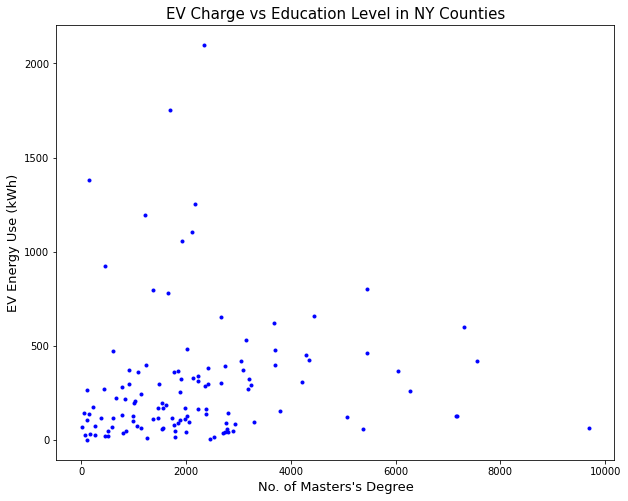

In [181]:
mean_masters_degree = []
mean_charging_energy = []
for i in range(len(demo)):
    if len(demo[i])!=0:
        mean_masters_degree.append(np.mean(demo[i]['Educational Attainment (Master\'s degree)'].values))
        mean_charging_energy.append(np.mean(data_charging[data_charging['ZIP Code']==zip_codes_demo[i]]['Energy (kWh)'].values))

plt.figure(figsize=(10,8))
plt.plot(mean_masters_degree,mean_charging_energy,'b.')
plt.title('EV Charge vs Education Level in NY Counties',fontsize=15)
plt.xlabel('No. of Masters\'s Degree',fontsize=13)
plt.ylabel('EV Energy Use (kWh)',fontsize=13)
plt.savefig('plots/EV_Charge_vs_Education.png',dpi=300)
plt.show()

In [157]:
data_charging['Start Date'] = pd.to_datetime(data_charging['Start Date'])
data_rebate['Submitted Date'] = pd.to_datetime(data_rebate['Submitted Date'])

In [165]:
data_charging['Start Date'].min(),data_rebate['Submitted Date'].min()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2017-03-23 00:00:00'))

In [166]:
data_charging['Start Date'].max(),data_rebate['Submitted Date'].max()

(Timestamp('2020-12-01 00:00:00'), Timestamp('2020-12-30 00:00:00'))

In [167]:
date_ranges = pd.date_range(start=data_rebate['Submitted Date'].min(),end=data_charging['Start Date'].max(),freq="30.5D")

In [168]:
monthly_energy = []
number_of_purchases = []
for i in range(len(date_ranges)-1):
    start_date = date_ranges[i]
    end_date = date_ranges[i+1]
    after_start_charging = data_charging['Start Date'] >= start_date
    before_end_charging =  data_charging['Start Date'] <= end_date
    between_two_charging = after_start_charging & before_end_charging
    filtered_charging = data_charging.loc[between_two_charging]
    monthly_energy.append(np.mean(filtered_charging['Energy (kWh)'].values))
    
    after_start_rebate = data_rebate['Submitted Date'] >= start_date
    before_end_rebate =  data_rebate['Submitted Date'] <= end_date
    between_two_rebate = after_start_rebate & before_end_rebate
    filtered_rebate = data_rebate.loc[between_two_rebate]
    number_of_purchases.append(len(filtered_rebate))

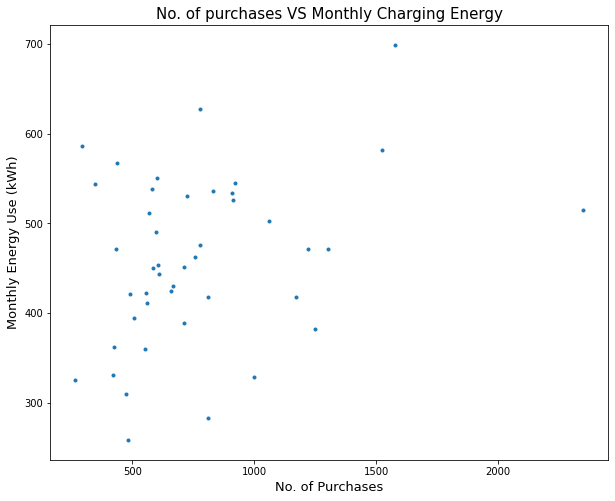

In [182]:
plt.figure(figsize=(10,8))
plt.plot(number_of_purchases,monthly_energy,'.')
plt.title('No. of purchases VS Monthly Charging Energy',fontsize=15)
plt.xlabel('No. of Purchases',fontsize=13)
plt.ylabel('Monthly Energy Use (kWh)',fontsize=13)
plt.savefig('plots/Purchase_vs_Energy.png',dpi=300)
plt.show()

## Blue line below shows start of COVID Pandemic

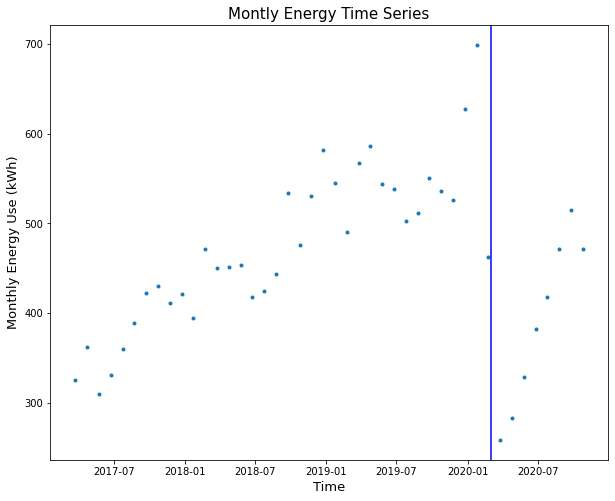

In [189]:
plt.figure(figsize=(10,8))
plt.plot(date_ranges[:-1],monthly_energy,'.')
plt.title('Montly Energy Time Series',fontsize=15)
plt.axvline('2020-03',c='blue')
plt.xlabel('Time',fontsize=13)
plt.ylabel('Monthly Energy Use (kWh)',fontsize=13)
plt.savefig('plots/Energy_time_series.png',dpi=300)
plt.show()

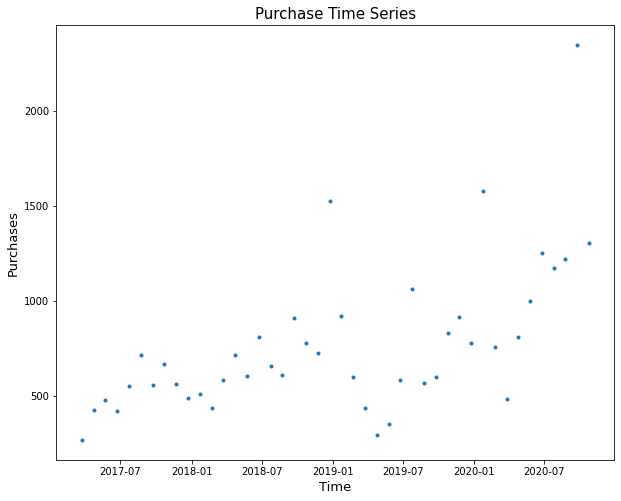

In [191]:
plt.figure(figsize=(10,8))
plt.plot(date_ranges[:-1],number_of_purchases,'.')
plt.title('Purchase Time Series',fontsize=15)
plt.xlabel('Time',fontsize=13)
plt.ylabel('Purchases',fontsize=13)
plt.savefig('plots/Purchase_time_series.png',dpi=300)
plt.show()